# Линейная регрессия.

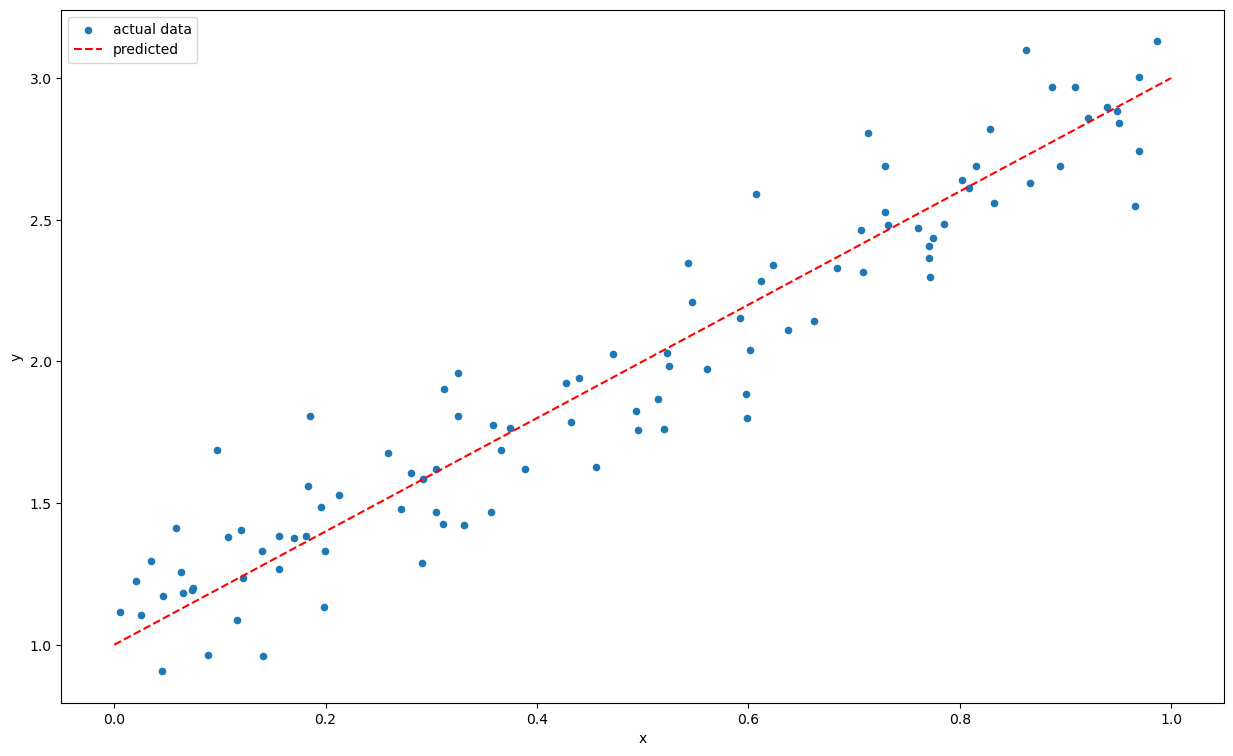

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.random.rand(100)
# x = np.random.uniform(0, 1, 20)

def f(x): 
    return 2 * x + 1

noise_variance = 0.2  
noise = np.random.randn(x.shape[0]) * noise_variance
y = f(x) + noise

plt.figure(figsize = (15, 9))
plt.scatter(x, y, s = 20, label = 'actual data')
plt.plot([0, 1], [f(0), f(1)], '--', color = 'red', label = 'predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## Среднеквадратичная ошибка

$$MSE = \frac{1}{n} \sum_{i = 1}^{n} (y - \hat y)^2$$

где y - истинное значение целевой переменной, а $\hat y$ - предсказанное значение целевой переменной


**Рассмотрим пример**
Ваш друг загадал число от 1 до 100 и попросил угадать вас, что же за число он загадал. Вы предположили, что друг загадал число 31, т.к. он родился 31-го числа. На самом деле друг загадал число 42 - как ответ на вопрос жизни, смерти и всего-всего. 

Таким образом квадратичная ошибка вашего предсказания равна: $(42-31)^{2} = 11^2 = 121$

In [3]:
# Функция для вычисления MSE 

def mse(y_actual, y_predicted):
    return np.mean((y_actual - y_predicted) ** 2) # расчет по формуле


## Модель линейной регрессии

Запишем нашу задачу в матричном виде:

Пусть **X** - матрица признаков, где каждая строка это определенное наблюдение, а столбцы - различные признаки.

Ей в соответствие ставится матрица (в нашем случае вектор) с целевой переменной **y**

Тогда предсказание $\hat y$ линейной регрессии можно записать в следующем виде:
$$\hat y = (X, w) + b$$

где X - исходная матрица признаков, w - вектор весов модели, b - величина сдвига предсказания.

Вектор w и значение b являются параметрами модели, которые изменяются во время обучения модели

Веса w модели можно найти по формуле:
$$\hat w = (X^TX)^{-1}X^Ty$$
 однако такой подход не подходит для реальных задач в силу своей вычислительной сложности

In [4]:
# Функция для модели линейной регрессии
def model(x, w):
    return x * w

## Производная

Производная - показывает направление изменения функции. Производная функции $f(x)$ обозначается как $f'(x)$

В рамках курса нам будет интересны только вычисление производной для функции $f(x) = x^{n}$: $f'(x) = nx^{n-1}$

**Чему равна производная функции?** $f(x) = 3x^3 + x - 128$

## Градиентный спуск

Градиентный спуск применяется для быстрого нахождения оптимальных параметров модели

Запишем задачу обучения модели как $$w = argmin_{w}(L(\hat y, y))$$

где $L$ - loss функция нашей модели, $argmin$ - функция которая находит минимум и возвращает аргумент (в нашем случае вектор параметров w) при котором он был достигнут.

Конкретный вид функции потерь зависит от выбранного алгоритма, но всякая функция потерь - это **векторная функция**, т.е. она параметрами такой функции будет вектор, а значением - скаляр.

**Градиент векторной функции** - это вектор, который состоит из производных функции по каждому аргументу. Градиент обозначается символом "набла" $\nabla$ и показывает направление в котором находится минимум функции

$$\nabla f(x) = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n})$$

Рассмотрим пример:

$f(x) = x^3 + 2y + 13$

Из школьных формул математики мы знаем, что производная функции $x^n$ равна $nx^{n-1}$ 

Тогда $\nabla f(x) = 3x^2 + 2$

**Чему равен градиент функции** $f(x) = 12z + 3x^2 + y + 7$ ?

**Шаг градиентного спуска** записывается в следующем виде:

$$ w^{(t)} = w^{(t-1)} - \mu \nabla f(w^{(t-1)}) $$

Где $w^{(t)}$ - вектор весов в момент времени t, $\mu$ - скорость обучения (learning rate), $f(w)$ - функция потерь


## Итоговый алгоритм линейной регрессии:

-    Инициализируем вектор весов. Его размер равен количеству признаков

-    Считаем предсказание умножая матрицу признаков и вектор весов

-    Находим значение ошибки

-    При помощи градиентного спуска обновляем веса так, чтобы минимизировать ошибку

In [11]:
# Функция, считающая градиент функции средне-квадратичной ошибки

def grad(w, x, y):
    """y' = model(x, w)"""
    return 2 * x * (model(x,w) - y)

# Функция, считающая значение, на которое будут изменяться веса модели
def delta_w(w_t, x, y, learning_rate):
    return learning_rate * np.mean(grad(w_t, x, y))

# Инициализируем веса случайными числами
w = np.random.rand()

# Задаем скорость обучения
learning_rate = 0.8

# Задаем количество итераций нашего алгоритма
iterations = 10

# Массив со значениями средней ошибки для каждой итерации
w_loss = [(w, mse(model(x, w), y))] 

for i in range(iterations):
    dw = delta_w(w, x, y, learning_rate)  
    w = w - dw  
    w_loss.append((w, mse(model(x, w), y))) 

for i in range(0, len(w_loss)):
    print(f' значения вектора весов на {i}-й итерации: {w_loss[i][0]:.4f} \t Средняя ошибка: {w_loss[i][1]:.4f}')

 значения вектора весов на 0-й итерации: 0.2808 	 Средняя ошибка: 3.5336
 значения вектора весов на 1-й итерации: 1.8691 	 Средняя ошибка: 1.1588
 значения вектора весов на 2-й итерации: 2.6730 	 Средняя ошибка: 0.5505
 значения вектора весов на 3-й итерации: 3.0798 	 Средняя ошибка: 0.3947
 значения вектора весов на 4-й итерации: 3.2858 	 Средняя ошибка: 0.3548
 значения вектора весов на 5-й итерации: 3.3900 	 Средняя ошибка: 0.3446
 значения вектора весов на 6-й итерации: 3.4427 	 Средняя ошибка: 0.3419
 значения вектора весов на 7-й итерации: 3.4694 	 Средняя ошибка: 0.3413
 значения вектора весов на 8-й итерации: 3.4829 	 Средняя ошибка: 0.3411
 значения вектора весов на 9-й итерации: 3.4897 	 Средняя ошибка: 0.3411
 значения вектора весов на 10-й итерации: 3.4932 	 Средняя ошибка: 0.3410


## Библиотека sklearn

In [14]:
!pip3 install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [13]:
# Модуль Линейных моделей
from sklearn.linear_model import LinearRegression

# Модуль метрик
from sklearn.metrics import mean_squared_error

# Модуль предобработки данных
from sklearn.model_selection import train_test_split

# И многое другое

-    User guide - отлично написанный раздел с объяснением всей теории модулей и практическими примерами: https://scikit-learn.org/stable/user_guide.html

-    API - документация: https://scikit-learn.org/stable/modules/classes.html